In [4]:
import pandas as pd
import glob
#FILES=['./swine_h1n1.csv','./swine_h3n2.csv','./h5n1.csv','./h5n2.csv','./h5n6.csv','./h3n2.csv']

FILES=glob.glob('predictions/h*csv')
seqf=pd.DataFrame()

for file in FILES:
    print(file)
    #cols=['id','geometric_mean_risk']
    seqf2=pd.read_csv(file).dropna()#.head(15)
    #seqf2['IRATe']=(-8.1*seqf2.geometric_mean_risk) + 6.2
    seqf2['IRATe']=seqf2['predicted_irat_score']
    seqf=pd.concat([seqf,seqf2])

predictions/h9n2.csv
predictions/h5n6.csv
predictions/h3n2.csv
predictions/h5n1.csv
predictions/h1n2.csv
predictions/h5n8.csv
predictions/h7.csv
predictions/h1n1.csv
predictions/h5n2.csv


In [5]:
seqf

,id,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,predicted_irat_score,IRATe
0,A/chicken/Korea/LBM314/2020,MEAVSLITILVVATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.028961,0.000116,0.051293,0.014672,0.038542,5.967951,5.967951
1,A/chicken/Korea/LBM261/2020,MEAVSLITILVVATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.028888,0.000116,0.051293,0.014672,0.038493,5.968765,5.968765
2,A/mallard/Russia_Primorje/48T/2020,METITLIVILLVTTTGNADKICIGYQSTNSTETVDTLIENNVPVTH...,MNPNQKIITIGSVSLTIAIVCFLMQIAILATTITLHFKQNECSIPS...,0.044630,0.000066,0.460189,0.015214,0.143311,3.801687,3.801687
3,A/chicken/Laos/DC4170/2020,MKTASLITILLVVTASNADKICIGYQSTNSTETVDTLTESNVPVTH...,MNPNQKIIAIGAVSLIIAIICLLMQITILVTTMTLHFQHNGCTNSS...,0.022286,0.000051,0.471981,0.016404,0.102561,4.161986,4.161986
4,A/duck/Laos/DC4184/2020,MKTASLITILLVVTASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKIIAIGAVSLIIAIICLLMQITILVTTMTLHFQHNGCTNSS...,0.022140,0.000052,0.471981,0.016404,0.102224,4.165965,4.165965
...,...,...,...,...,...,...,...,...,...,...
15,A/chicken/Poland/H182_22VIR2515-1/2022,MENIVLLLATVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSVSLTIATVCFLMQIAILTTTITLHFKQNECSIPS...,0.233527,0.024109,0.513320,0.003036,0.346228,4.634290,4.634290
16,A/Anas_platyrhynchos/Belgium/10413_0003/2020,MERIVLLLALVSLVEGDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSVSLTIATVCFLMQIAILTTTITLHFKQNECSIPS...,0.291923,0.014436,0.511736,0.003008,0.386507,5.392660,5.392660
17,A/chicken/Jalisco/CPA-03604-19/2020,MKRIVIAFAIISIVAGDQICIGYHANNSTTQIDTIMEKNVTVTHAQ...,MNPNQKILTIGSISLTIAIACFLVQIAILTNTIMLHFKQSECNIPA...,0.303730,0.012910,0.439032,0.005180,0.365167,5.183949,5.183949
18,A/Sanderling/Delaware/518/2021,MERIVIALAIISIVKGDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITISSVSLTIATVCFLMQIAILATTVTLHFKQNECSIPP...,0.299052,0.014241,0.513174,0.003047,0.391747,5.500388,5.500388


In [6]:
def getInfo(term="A/swine/Minnesota/A02711856/2022",variables=None,lookup=False):
    if not lookup:
        print(term)
        if '/' in term:
            return term.split('/')[2]
        if '_' in term:
            return term.split('_')[2]
    from Bio import Entrez
    Entrez.email = "ishanu@uchicago.edu"    
    handle = Entrez.esearch(db="nucleotide", term=term)
    record = Entrez.read(handle)
    Ldict={}
    for ID in record["IdList"]:
        handle = Entrez.efetch(db="nucleotide", id="2289156410", rettype="gb", retmode="json")
        XML=handle.read()
        LINES=[x.strip() for x in XML.split('\n')]
        LINES=[x[1:]+x[0].replace('/','') for x in LINES if '/' in x[:1] and '=' in x]
        Ldict[ID]={x.split('=')[0]:x.split('=')[1] for x in LINES }
    df=pd.DataFrame(Ldict).transpose().drop_duplicates().transpose()   
    if df.empty:
        return term.split('/')[2]
    return df.loc['country'].values[0]    

In [7]:
def getCountry(row):
    #print(row.id)
    return getInfo(row.id)
seqf['country']=seqf.apply(getCountry, axis=1)
seqf.to_csv('seqf.csv')

A/chicken/Korea/LBM314/2020
A/chicken/Korea/LBM261/2020
A/mallard/Russia_Primorje/48T/2020
A/chicken/Laos/DC4170/2020
A/duck/Laos/DC4184/2020
A/Envionment/Laos/DC4191/2020
A/duck/Laos/DC4383/2020
A/chicken/Laos/DC6058/2020
A/chicken/Laos/DC3915/2020
A/chicken/Laos/DC3916/2020
A/chicken/Laos/DC4152/2020
A/chicken/Laos/DC4154/2020
A/chicken/Laos/DC4156/2020
A/chicken/Laos/DC4171/2020
A/chicken/Laos/DC4178/2020
A/duck/Laos/DC4166/2020
A/duck/Laos/DC4168/2020
A/duck/Laos/DC4185/2020
A/duck/Laos/DC4186/2020
A/chicken/Laos/DC4043/2020
A/chicken/Laos/DC4047/2020
A/chicken/Laos/DC4049/2020
A/chicken/Laos/DC4050/2020
A/chicken/Laos/DC4051/2020
A/chicken/Laos/DC4052/2020
A/chicken/Laos/DC4053/2020
A/duck/Laos/DC4030/2020
A/duck/Laos/DC4032/2020
A/duck/Laos/DC4056/2020
A/duck/Laos/DC4057/2020
A/chicken/Laos/DC4365/2020
A/chicken/Laos/DC4366/2020
A/chicken/Laos/DC4370/2020
A/chicken/Laos/DC4371/2020
A/chicken/Laos/DC4401/2020
A/chicken/Laos/DC4402/2020
A/chicken/Laos/DC4406/2020
A/chicken/Laos/DC4

In [8]:
af=pd.read_csv('seqf.csv',index_col=0).reset_index()#.country.value_counts()
cf=pd.DataFrame(af.country.value_counts())
cf.columns=['cnt']
cf.index.name='country'
af=af.join(cf,on='country')
cf=cf.reset_index()
af

,index,id,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,predicted_irat_score,IRATe,country,cnt
0,0,A/chicken/Korea/LBM314/2020,MEAVSLITILVVATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.028961,0.000116,0.051293,0.014672,0.038542,5.967951,5.967951,Korea,124
1,1,A/chicken/Korea/LBM261/2020,MEAVSLITILVVATVSNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,0.028888,0.000116,0.051293,0.014672,0.038493,5.968765,5.968765,Korea,124
2,2,A/mallard/Russia_Primorje/48T/2020,METITLIVILLVTTTGNADKICIGYQSTNSTETVDTLIENNVPVTH...,MNPNQKIITIGSVSLTIAIVCFLMQIAILATTITLHFKQNECSIPS...,0.044630,0.000066,0.460189,0.015214,0.143311,3.801687,3.801687,Russia_Primorje,3
3,3,A/chicken/Laos/DC4170/2020,MKTASLITILLVVTASNADKICIGYQSTNSTETVDTLTESNVPVTH...,MNPNQKIIAIGAVSLIIAIICLLMQITILVTTMTLHFQHNGCTNSS...,0.022286,0.000051,0.471981,0.016404,0.102561,4.161986,4.161986,Laos,83
4,4,A/duck/Laos/DC4184/2020,MKTASLITILLVVTASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKIIAIGAVSLIIAIICLLMQITILVTTMTLHFQHNGCTNSS...,0.022140,0.000052,0.471981,0.016404,0.102224,4.165965,4.165965,Laos,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,15,A/chicken/Poland/H182_22VIR2515-1/2022,MENIVLLLATVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSVSLTIATVCFLMQIAILTTTITLHFKQNECSIPS...,0.233527,0.024109,0.513320,0.003036,0.346228,4.634290,4.634290,Poland,70
6250,16,A/Anas_platyrhynchos/Belgium/10413_0003/2020,MERIVLLLALVSLVEGDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSVSLTIATVCFLMQIAILTTTITLHFKQNECSIPS...,0.291923,0.014436,0.511736,0.003008,0.386507,5.392660,5.392660,Belgium,50
6251,17,A/chicken/Jalisco/CPA-03604-19/2020,MKRIVIAFAIISIVAGDQICIGYHANNSTTQIDTIMEKNVTVTHAQ...,MNPNQKILTIGSISLTIAIACFLVQIAILTNTIMLHFKQSECNIPA...,0.303730,0.012910,0.439032,0.005180,0.365167,5.183949,5.183949,Jalisco,1
6252,18,A/Sanderling/Delaware/518/2021,MERIVIALAIISIVKGDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITISSVSLTIATVCFLMQIAILATTVTLHFKQNECSIPP...,0.299052,0.014241,0.513174,0.003047,0.391747,5.500388,5.500388,Delaware,10


In [9]:
#cf.loc[22]={'country':'xxx','cnt':20}
#cf

In [10]:
bf=cf.join(pd.read_csv('seqfgeo',index_col=0).set_index('input_string'),on='country')
uf=bf[bf.latitude.isna()].to_csv('newseqf.csv')

In [11]:
! cat seqfgeo

,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,input_string,number_of_results,status
0,Denmark,56.26392,9.501785,APPROXIMATE,ChIJ-1-U7rYnS0YRzZLgw9BDh1I,"country,political",,Denmark,1,OK
1,"North Carolina, USA",35.7595731,-79.01929969999999,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",,North_Carolina,1,OK
2,"Minnesota, USA",46.729553,-94.6858998,APPROXIMATE,ChIJmwt4YJpbWE0RD6L-EJvJogI,"administrative_area_level_1,political",,Minnesota,1,OK
3,"Kansas, USA",39.011902,-98.4842465,APPROXIMATE,ChIJawF8cXEXo4cRXwk-S6m0wmg,"administrative_area_level_1,political",,Kansas,1,OK
4,"Oklahoma, USA",35.0077519,-97.092877,APPROXIMATE,ChIJnU-ssRE5rIcRSOoKQDPPHF0,"administrative_area_level_1,political",,Oklahoma,1,OK
8,"Texas, USA",31.9685988,-99.9018131,APPROXIMATE,ChIJSTKCCzZwQIYRPN4IGI8c6xY,"administrative_area_level_1,political",,Texas,1,OK
9,Italy,41.87194,12.56738,APPROXIMATE,ChIJA9KNRIL-1BIRb15jJFz1LOI,"country,political",,Italy,1,

In [12]:
# warning! .. running this too many times costs money
! ./geocode.py -i newseqf.csv -o newseqfgeo -A country

{'formatted_address': 'London, UK', 'latitude': 51.5072178, 'longitude': -0.1275862, 'accuracy': 'APPROXIMATE', 'google_place_id': 'ChIJdd4hrwug2EcRmSrV3Vo6llI', 'type': 'locality,political', 'postcode': '', 'input_string': 'London, England', 'number_of_results': 1, 'status': 'OK'}
Geocoded: Egypt: OK
Geocoded: Delaware_Bay: OK
Error geocoding Kagawa: ZERO_RESULTS
Geocoded: Kagawa: ZERO_RESULTS
Geocoded: Omsk: OK
Error geocoding -: ZERO_RESULTS
Geocoded: -: ZERO_RESULTS
Error geocoding Miyazaki: ZERO_RESULTS
Geocoded: Miyazaki: ZERO_RESULTS
Geocoded: Sanmenxia: OK
Geocoded: Shandong: OK
Geocoded: Liaoning: OK
Geocoded: Kosovo: OK
Geocoded: South_Korea: OK
Geocoded: Ningxia: OK
Geocoded: Kazakhstan: OK
Geocoded: Henan: OK
Geocoded: Astrakhan: OK
Geocoded: Morocco: OK
Geocoded: Chelyabinsk: OK
Geocoded: Tochigi: OK
Geocoded: Rostov-on-Don: OK
Geocoded: Toyama: OK
Geocoded: Ibaraki: OK
Geocoded: Tokushima: OK
Geocoded: Niigata: OK
Geocoded: Germany-SN: OK
Geocoded: Krasnodar: OK
Geocoded:

In [13]:
pd.concat([pd.read_csv('seqfgeo',index_col=0),pd.read_csv('newseqfgeo',index_col=0)]).drop_duplicates().to_csv('seqfgeo')

In [14]:
gf=pd.read_csv('seqfgeo',index_col=0)
geof=seqf.join(gf.set_index('input_string'),on='country')
geof=geof[geof.status=='OK']

In [15]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import contextily as ctx
import geopandas
import geoplot as gplt
import pylab as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import json


In [16]:
geo_DF=geopandas.GeoDataFrame(
    geof, crs="EPSG:4326",geometry=geopandas.points_from_xy(geof.longitude, geof.latitude))
df=geo_DF.to_crs('epsg:4326')
df_=df.to_crs('epsg:4326')
df__ = df.to_crs(epsg=3857) # reproject it in Web mercator
geo_DF__ = geo_DF.to_crs(epsg=3857) # reproject it in Web mercator

In [254]:
def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0,alpha=None):
    if alpha is None:
        alpha=1
    else:
        alpha = (((x-VMIN)/(VMAX-VMIN)))
    if alpha == 1:
        alpha=.999
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    ctup=np.array(list(m.to_rgba(x)))
    ctup[3]=alpha
    return tuple(ctup)

def getColor(x,cmap='jet',VMIN=.5,VMAX=1.0):
    norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(x)

def mssize(x):
    return ((3.5**(x-2))) + (x>6.76)*900 + 40
#        return ((4.5**(x-2))) + (x>6.5)*200

def plotRisk(df,ax,variable='IRATe',ALPHA=.2,COL=None,
             cmap='jet',VMIN=0,VMAX=None,markersize=20,markeredgecolor='w'):
    df=df.sort_values(variable,ascending=True)
    if VMAX is None:
        VMAX=1
        
   
    #MS = lambda x: ((4.5**(x-2))) 
    MS = lambda x: mssize(x) 
    
    df.plot(
        ax=ax,
        markersize=markersize* MS(df[variable]),
        edgecolor=markeredgecolor,lw=.5,
        color=(.7,.3,.3,.2),#'k',#getColor(df[variable],cmap=cmap,VMIN=VMIN,VMAX=VMAX),
        #alpha=ALPHA
    )
    #fraction=.025
    #norm = mpl.colors.Normalize(vmin=VMIN, vmax=VMAX)
    #cax = ax.inset_axes([.4, 0.1, 0.3, 0.025])
    #cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),orientation='horizontal',
    #        ax=ax, cax=cax,pad=.0, fraction=fraction)
    #cbar.ax.set_title('estimated IRAT emergence score',fontsize=20,color='k')
    #cbar.ax.tick_params(labelsize=20,labelcolor='k')
    
    return ax    

def saveFIG(filename='tmp.pdf'):
    import pylab as plt
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename,dpi=300, bbox_inches = 'tight',pad_inches = 0,transparent=True) 
    return

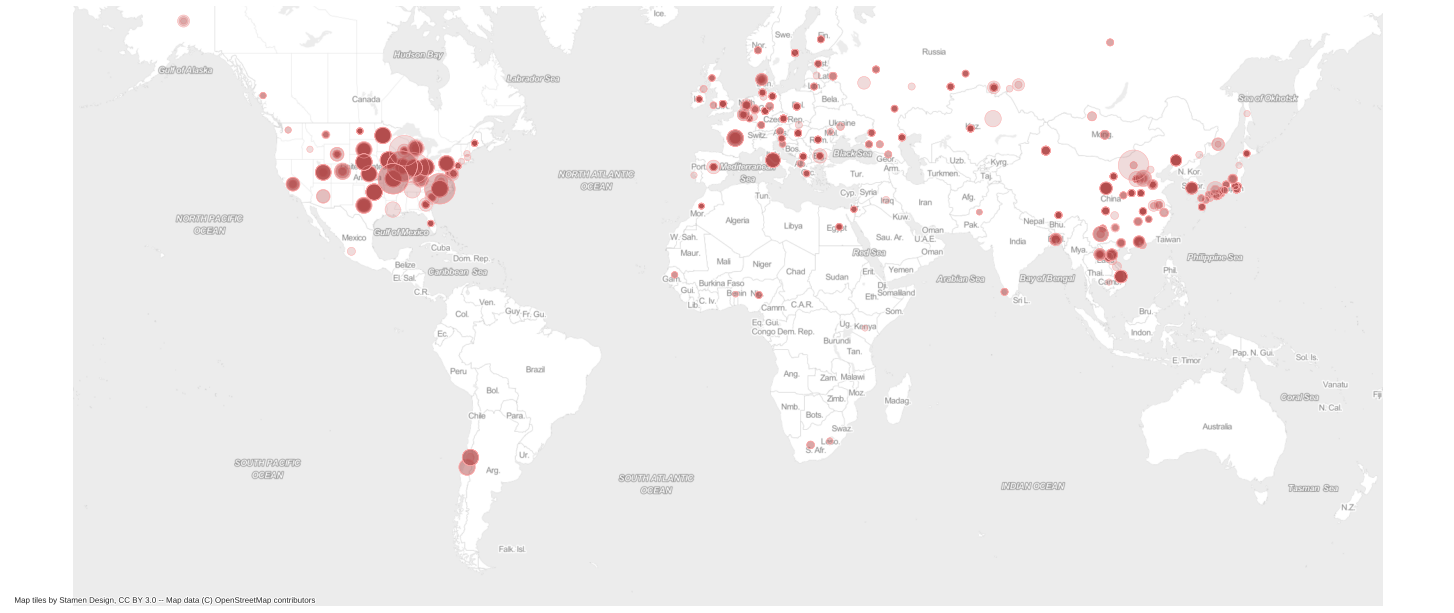

In [255]:
from matplotlib import cm
cmap = cm.gist_rainbow
cmap = cm.gray
#import 
fname1='./WB_Coastlines_10m/WB_Coastlines_10m.shp'
df1 = geopandas.read_file(fname1)
plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
df1__ = df1.to_crs(epsg=3857) # reproject it in Web mercator
ax1 = df1__.plot(figsize=(20,20), alpha=.05, edgecolor='w')
variable='IRATe'
#cmap='gnuplot2'
#cmap='viridis'
#cmap=plt.get_cmap('cool')
VMIN=geo_DF__.IRATe.min()
VMAX=geo_DF__.IRATe.max()
ALPHA=1
plotRisk(geo_DF__,ax=ax1,cmap=cmap,markersize=.7,ALPHA=ALPHA,
         markeredgecolor='#ffaaaa',VMIN=geo_DF__.IRATe.min(),
         VMAX=geo_DF__.IRATe.max())
ctx.add_basemap(ax1,source=ctx.providers.Stamen.TonerLite,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Toner)
#ctx.add_basemap(ax1,source=ctx.providers.Stamen.Watercolor,alpha=.5)
#ctx.add_basemap(ax1,source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012,alpha=1)
#ax1.set_ylim(-.92e7,None)
ax1.set_ylim(-.85e7,.985e7)
ax1.set_axis_off()
#saveFIG(filename='bionorad_black.png')
saveFIG(filename='/home/ishanu/Dropbox/bionorad_wcol.png')

In [205]:
pd.DataFrame(geo_DF.sort_values('IRATe').IRATe.value_counts()).reset_index().sort_values('index').tail(30)

,index,IRATe
1358,6.694753,1
1359,6.694827,1
197,6.695055,4
1360,6.695683,1
1353,6.696002,1
1343,6.699028,1
1342,6.705358,1
1341,6.708439,1
1324,6.719905,1
1325,6.724762,1


In [248]:
pd.DataFrame(geo_DF.sort_values('IRATe')).tail(10)

,id,ha,na,HA_Avg_Qdist,ha_variance,NA_Avg_Qdist,na_variance,Geometric_Mean,predicted_irat_score,IRATe,...,formatted_address,latitude,longitude,accuracy,google_place_id,type,postcode,number_of_results,status,geometry
13,A/swine/Indiana/A02524436/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.008075,0.000010,0.001876,2.438430e-06,0.003892,6.760762,6.760762,...,"Indiana, USA",40.267194,-86.134902,APPROXIMATE,ChIJHRv42bxQa4gRcuwyy84vEH4,"administrative_area_level_1,political",NaN,1,OK,POINT (-86.13490 40.26719)
231,A/swine/Illinois/A02524729/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,0.000010,0.001889,2.438919e-06,0.003871,6.760962,6.760962,...,"Illinois, USA",40.633125,-89.398528,APPROXIMATE,ChIJGSZubzgtC4gRVlkRZFCCFX8,"administrative_area_level_1,political",NaN,1,OK,POINT (-89.39853 40.63312)
424,A/swine/Illinois/A02525197/2021,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.008006,0.000010,0.001876,2.438430e-06,0.003875,6.761017,6.761017,...,"Illinois, USA",40.633125,-89.398528,APPROXIMATE,ChIJGSZubzgtC4gRVlkRZFCCFX8,"administrative_area_level_1,political",NaN,1,OK,POINT (-89.39853 40.63312)
165,A/swine/North_Carolina/A02479181/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,0.000010,0.001885,2.438602e-06,0.003866,6.761066,6.761066,...,"North Carolina, USA",35.759573,-79.019300,APPROXIMATE,ChIJgRo4_MQfVIgRGa4i6fUwP60,"administrative_area_level_1,political",NaN,1,OK,POINT (-79.01930 35.75957)
124,A/swine/Missouri/A02479058/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,0.000010,0.001885,2.438602e-06,0.003866,6.761066,6.761066,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-91.83183 37.96425)
373,A/swine/Illinois/A02525010/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007974,0.000010,0.001876,2.438430e-06,0.003868,6.761139,6.761139,...,"Illinois, USA",40.633125,-89.398528,APPROXIMATE,ChIJGSZubzgtC4gRVlkRZFCCFX8,"administrative_area_level_1,political",NaN,1,OK,POINT (-89.39853 40.63312)
157,A/swine/Missouri/A02479157/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007954,0.000010,0.001876,2.438430e-06,0.003863,6.761215,6.761215,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-91.83183 37.96425)
142,A/swine/Wisconsin/A02479131/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007945,0.000010,0.001876,2.438430e-06,0.003860,6.761247,6.761247,...,"Wisconsin, USA",43.784440,-88.787868,APPROXIMATE,ChIJr-OEkw_0qFIR1kmG-LjV1fI,"administrative_area_level_1,political",NaN,1,OK,POINT (-88.78787 43.78444)
218,A/swine/Missouri/A02524711/2020,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.007931,0.000010,0.001876,2.438430e-06,0.003857,6.761297,6.761297,...,"Missouri, USA",37.964253,-91.831833,APPROXIMATE,ChIJfeMiSNXmwIcRcr1mBFnEW7U,"administrative_area_level_1,political",NaN,1,OK,POINT (-91.83183 37.96425)
126,A/Camel/Inner_Mongolia/XL/2020,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTEREVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,0.014006,0.002855,0.001182,2.218687e-07,0.004069,6.769213,6.769213,...,"Inner Mongolia, China",40.817330,111.765220,APPROXIMATE,ChIJ3xRp0kvMBTYRUOnCbYFGl9U,"administrative_area_level_1,political",NaN,1,OK,POINT (111.76522 40.81733)
